# training on existing Data

In [1]:
import numpy as np
import cv2 
import os
import tensorflow as tf 
from tensorflow import keras
import matplotlib.pyplot as plt
import time
import pandas as pd

2022-05-23 20:43:57.778604: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /home/mina/.local/lib/python3.8/site-packages/cv2/../../lib64:
2022-05-23 20:43:57.778619: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [2]:
actions = ['one','you','teacher','girl','tomorrow','mom','look','crazy','walk','agree','family','friends','get_to_know','help','how_are_you','love','street','teach_me','thank_yuo','want']

In [3]:
actions

['one',
 'you',
 'teacher',
 'girl',
 'tomorrow',
 'mom',
 'look',
 'crazy',
 'walk',
 'agree',
 'family',
 'friends',
 'get_to_know',
 'help',
 'how_are_you',
 'love',
 'street',
 'teach_me',
 'thank_yuo',
 'want']

In [5]:
train_data = np.concatenate([
    np.load(os.path.join("key_points",'train','0.npy')),
    np.load(os.path.join("key_points",'train','1.npy')),
    np.load(os.path.join("key_points",'train','2.npy')),
    np.load(os.path.join("key_points",'old_train','0.npy')),
    np.load(os.path.join("key_points",'old_train','1.npy')),
    np.load(os.path.join("key_points",'old_train','2.npy')),
])

train_labels = np.concatenate([
    np.load(os.path.join("key_points",'train','labels.npy')),
    np.load(os.path.join("key_points",'train','labels.npy')),
    np.load(os.path.join("key_points",'train','labels.npy')),
    np.load(os.path.join("key_points",'old_train','labels.npy')),
    np.load(os.path.join("key_points",'old_train','labels.npy')),
    np.load(os.path.join("key_points",'old_train','labels.npy')),
])

test_data = np.concatenate([
    np.load(os.path.join("key_points","test",'data.npy')) ,
    np.load(os.path.join("key_points","old_test",'data.npy')) 
])

test_labels = np.concatenate([
    np.load(os.path.join("key_points","test",'labels.npy')) ,
    np.load(os.path.join("key_points","old_test",'labels.npy')) 
])


print(
train_data.shape,
    train_labels.shape,
    test_data.shape,
    test_labels.shape
    
)

(10512, 16, 62) (10512,) (399, 16, 62) (399,)


In [6]:
perm = np.random.permutation(len(train_data))

train_X = train_data[perm]
train_Y = train_labels[perm]
test_X = test_data
test_Y = test_labels

print(
train_X.shape,
train_Y.shape,
test_X.shape,
test_Y.shape,
)


(10512, 16, 62) (10512,) (399, 16, 62) (399,)


In [8]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense,Input,Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import TensorBoard,ModelCheckpoint,EarlyStopping

# v1 ->95% training , 88% validation,84% test
# v1 =  os.path.join("final_train_weights","first_model_V1.h5")
best_model_file_name = os.path.join("weights","best.h5")


checkpoint = ModelCheckpoint(os.path.join(best_model_file_name), monitor='loss', verbose=0,
    save_best_only=True, mode='auto', save_freq=1)
earlyStopping = EarlyStopping(monitor='loss', patience=20)

In [9]:
def first_model():
    input_layer = Input(shape=(20,62))
    layer = LSTM(64,return_sequences=True,activation="relu")(input_layer)
    layer = LSTM(128,return_sequences=True,activation="relu")(layer)
    layer = LSTM(256,return_sequences=True,activation="relu")(layer)
    layer = LSTM(128,return_sequences=True,activation="relu")(layer)
    layer = LSTM(64,return_sequences=False,activation="relu")(layer)
    layer = Dense(64,activation="relu")(layer)
    layer = Dense(len(actions),activation="softmax")(layer)

    model = Model(inputs=input_layer,outputs=layer)
    model.compile(optimizer='Adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    
    return model


def second_model():
    input_layer = Input(shape=(20,62))
    layer = LSTM(64,return_sequences=True,activation="relu")(input_layer)
    layer = LSTM(128,return_sequences=True,activation="relu")(layer)
    layer = Dropout(0.5)(layer)
    layer = LSTM(256,return_sequences=True,activation="relu")(layer)
    layer = Dropout(0.5)(layer)
    layer = LSTM(128,return_sequences=True,activation="relu")(layer)
    layer = Dropout(0.5)(layer)
    layer = LSTM(64,return_sequences=False,activation="relu")(layer)
    layer = Dense(64,activation="relu")(layer)
    layer = Dense(len(actions),activation="softmax")(layer)

    model = Model(inputs=input_layer,outputs=layer)
    model.compile(optimizer='Adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    
    
    return model

def third_model():
    input_layer = Input(shape=(16,62))
    layer = LSTM(64,return_sequences=True,activation="relu")(input_layer)
    layer = LSTM(128,return_sequences=True,activation="relu")(layer)
    layer = LSTM(96,return_sequences=False,activation="relu")(layer)
    layer = Dense(64,activation="relu")(layer)
    layer = Dense(len(actions),activation="softmax")(layer)


    model = Model(inputs=input_layer,outputs=layer)
    model.compile(optimizer="Adam", loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    
    return model



def fourth_model():
    input_layer = Input(shape=(16,62))
    layer = LSTM(64,return_sequences=True,activation="relu")(input_layer)
    layer = LSTM(128,return_sequences=True,activation="relu")(layer)
    layer = LSTM(256,return_sequences=True,activation="relu")(layer)
    layer = LSTM(96,return_sequences=False,activation="relu")(layer)
    layer = Dense(64,activation="relu")(layer)
    layer = Dense(len(actions),activation="softmax")(layer)


    model = Model(inputs=input_layer,outputs=layer)
    model.compile(optimizer="Adam", loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    
    return model


model = fourth_model()
model.summary()

2022-05-23 20:49:13.633698: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:939] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-05-23 20:49:13.634951: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /home/mina/.local/lib/python3.8/site-packages/cv2/../../lib64:
2022-05-23 20:49:13.635187: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcublas.so.11'; dlerror: libcublas.so.11: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /home/mina/.local/lib/python3.8/site-packages/cv2/../../lib64:
2022-05-23 20:49:13.635388: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcublasLt.so.11'; dlerror: libcublas

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 16, 62)]          0         
                                                                 
 lstm (LSTM)                 (None, 16, 64)            32512     
                                                                 
 lstm_1 (LSTM)               (None, 16, 128)           98816     
                                                                 
 lstm_2 (LSTM)               (None, 16, 256)           394240    
                                                                 
 lstm_3 (LSTM)               (None, 96)                135552    
                                                                 
 dense (Dense)               (None, 64)                6208      
                                                                 
 dense_1 (Dense)             (None, 20)                1300  

In [9]:
model.load_weights(os.path.join("weights","V1.h5"))

In [10]:
history = model.fit(train_X, train_Y, epochs=100, callbacks=[checkpoint,earlyStopping],validation_data=(test_X,test_Y),batch_size=16)

Epoch 1/100
657/657 [==============================] - 30s 43ms/step - loss: 2.2957 - accuracy: 0.1814 - val_loss: 1.8520 - val_accuracy: 0.3158
Epoch 2/100
657/657 [==============================] - 80s 122ms/step - loss: 1.7279 - accuracy: 0.3587 - val_loss: 1.3172 - val_accuracy: 0.5238
Epoch 3/100
657/657 [==============================] - 75s 114ms/step - loss: 1.2199 - accuracy: 0.5572 - val_loss: 0.9481 - val_accuracy: 0.6516
Epoch 4/100
657/657 [==============================] - 73s 111ms/step - loss: 0.8788 - accuracy: 0.6878 - val_loss: 0.6697 - val_accuracy: 0.7218
Epoch 5/100
657/657 [==============================] - 77s 118ms/step - loss: 0.6301 - accuracy: 0.7751 - val_loss: 0.4944 - val_accuracy: 0.8396
Epoch 6/100
657/657 [==============================] - 75s 113ms/step - loss: 0.4910 - accuracy: 0.8265 - val_loss: 0.4249 - val_accuracy: 0.8772
Epoch 7/100
657/657 [==============================] - 70s 107ms/step - loss: 0.4254 - accuracy: 0.8532 - val_loss: 0.4394 - 

657/657 [==============================] - 12s 18ms/step - loss: 0.0292 - accuracy: 0.9919 - val_loss: 0.0423 - val_accuracy: 0.9850
Epoch 58/100
657/657 [==============================] - 12s 18ms/step - loss: 0.0422 - accuracy: 0.9880 - val_loss: 0.0608 - val_accuracy: 0.9799
Epoch 59/100
657/657 [==============================] - 12s 18ms/step - loss: 0.0324 - accuracy: 0.9906 - val_loss: 0.0706 - val_accuracy: 0.9875
Epoch 60/100
657/657 [==============================] - 12s 18ms/step - loss: 0.3688 - accuracy: 0.9771 - val_loss: 0.1415 - val_accuracy: 0.9649
Epoch 61/100
657/657 [==============================] - 12s 19ms/step - loss: 0.0310 - accuracy: 0.9904 - val_loss: 0.0632 - val_accuracy: 0.9799
Epoch 62/100
657/657 [==============================] - 12s 19ms/step - loss: 0.0238 - accuracy: 0.9937 - val_loss: 0.0731 - val_accuracy: 0.9875
Epoch 63/100
657/657 [==============================] - 13s 19ms/step - loss: 0.0183 - accuracy: 0.9951 - val_loss: 0.0728 - val_accuracy

In [11]:
model.save_weights(os.path.join("weights","final.h5"))

In [12]:
model.load_weights(os.path.join("weights","best.h5"))
print(
    model.evaluate(train_X,train_Y),
    model.evaluate(test_X,test_Y)
)

13/13 [==============================] - 0s 8ms/step - loss: 0.0887 - accuracy: 0.9799
[0.021247373893857002, 0.9924848079681396] [0.08868233859539032, 0.9799498915672302]


In [13]:
model.load_weights(os.path.join("weights","final.h5"))
print(
    model.evaluate(train_X,train_Y),
    model.evaluate(test_X,test_Y)
)

13/13 [==============================] - 0s 8ms/step - loss: 0.0683 - accuracy: 0.9724
[0.017725441604852676, 0.9939117431640625] [0.06832781434059143, 0.9724310636520386]


In [14]:
model.load_weights(os.path.join("weights","best.h5"))

# evaluation


- write matplotlib code to display both of them
- then write function to display history and evaluation just one time

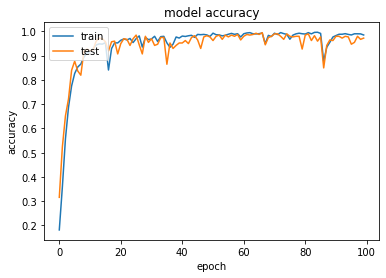

In [15]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

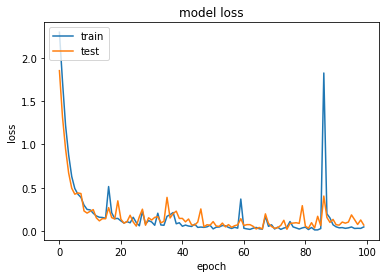

In [16]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [9]:
model = third_model()
model.load_weights(os.path.join("final_train_weights","third_model_V1.h5"))

In [18]:
for desired_class in range(20):
    x = []
    y = [] 
    for i,n in enumerate(train_Y):
        if n==desired_class:
            x.append(train_X[i])
            y.append(n)

    x = np.array(x)
    y = np.array(y)
    print(f"class : {desired_class}:{actions[desired_class]} -->",model.evaluate(x,y,verbose=0))
        

class : 0:one --> [0.14017033576965332, 0.9417989253997803]
class : 1:you --> [0.03577912226319313, 0.9869646430015564]
class : 2:teacher --> [5.188880822970532e-05, 1.0]
class : 3:girl --> [0.15702538192272186, 0.9450757503509521]
class : 4:tomorrow --> [0.0007461930508725345, 1.0]
class : 5:mom --> [0.0069121564738452435, 0.9980506896972656]
class : 6:look --> [0.008240905590355396, 0.9981378316879272]
class : 7:crazy --> [0.027088787406682968, 0.9922928810119629]
class : 8:walk --> [0.0015937982825562358, 1.0]
class : 9:agree --> [0.004349512979388237, 0.9980952143669128]
class : 10:family --> [0.002662163693457842, 1.0]
class : 11:friends --> [0.00347180780954659, 1.0]
class : 12:get_to_know --> [0.000609580718446523, 1.0]
class : 13:help --> [0.0035184312146157026, 1.0]
class : 14:how_are_you --> [0.00014207813364919275, 1.0]
class : 15:love --> [0.006667621899396181, 0.998106062412262]
class : 16:street --> [0.009226907044649124, 0.9962335228919983]
class : 17:teach_me --> [4.883

In [23]:
model = first_model()
model.load_weights(os.path.join("final_train_weights","first_model_V1.h5"))

In [24]:

for desired_class in range(10):
    x = []
    y = [] 
    for i,n in enumerate(val_Y):
        if n==desired_class:
            x.append(val_X[i])
            y.append(n)

    x = np.array(x)
    y = np.array(y)
    print(f"class : {desired_class}:{actions[desired_class]} -->",model.evaluate(x,y,verbose=0))
        

class : 0:sister --> [2.1439902782440186, 0.699999988079071]
class : 1:hurry --> [0.4425128996372223, 0.7894737124443054]
class : 2:hungry --> [0.23317945003509521, 0.8999999761581421]
class : 3:meal --> [0.05305203050374985, 0.9473684430122375]
class : 4:brother --> [0.9514178037643433, 0.699999988079071]
class : 5:tree --> [0.7925909757614136, 0.8500000238418579]
class : 6:heavy --> [0.0105934152379632, 1.0]
class : 7:cry --> [0.003288751933723688, 1.0]
class : 8:family --> [3.0288221751106903e-05, 1.0]
class : 9:wise --> [0.17635352909564972, 0.8947368264198303]


In [21]:
model = first_model()
model.load_weights(os.path.join("final_train_weights","first_model_V2.h5"))

In [22]:

for desired_class in range(10):
    x = []
    y = [] 
    for i,n in enumerate(val_Y):
        if n==desired_class:
            x.append(val_X[i])
            y.append(n)

    x = np.array(x)
    y = np.array(y)
    print(f"class : {desired_class}:{actions[desired_class]} -->",model.evaluate(x,y,verbose=0))
        

class : 0:sister --> [0.825576663017273, 0.8500000238418579]
class : 1:hurry --> [0.01183120533823967, 1.0]
class : 2:hungry --> [0.11262451112270355, 0.949999988079071]
class : 3:meal --> [0.5067373514175415, 0.8947368264198303]
class : 4:brother --> [1.662697434425354, 0.800000011920929]
class : 5:tree --> [0.34248995780944824, 0.8999999761581421]
class : 6:heavy --> [0.028256479650735855, 1.0]
class : 7:cry --> [0.06529584527015686, 1.0]
class : 8:family --> [0.0009215319296345115, 1.0]
class : 9:wise --> [0.23732376098632812, 0.8947368264198303]


In [ ]:
model = second_model()
model.load_weights(os.path.join("final_train_weights","second_model_V1.h5"))

In [18]:

for desired_class in range(10):
    x = []
    y = [] 
    for i,n in enumerate(val_Y):
        if n==desired_class:
            x.append(val_X[i])
            y.append(n)

    x = np.array(x)
    y = np.array(y)
    print(f"class : {desired_class}:{actions[desired_class]} -->",model.evaluate(x,y,verbose=0))
        

class : 0:sister --> [1.455183744430542, 0.75]
class : 1:hurry --> [0.24843087792396545, 0.8421052694320679]
class : 2:hungry --> [1.4502105712890625, 0.75]
class : 3:meal --> [0.39883410930633545, 0.8947368264198303]
class : 4:brother --> [0.8388317823410034, 0.800000011920929]
class : 5:tree --> [1.0407341718673706, 0.800000011920929]
class : 6:heavy --> [0.010108273476362228, 1.0]
class : 7:cry --> [0.0016583595424890518, 1.0]
class : 8:family --> [0.005287606734782457, 1.0]
class : 9:wise --> [0.2445170283317566, 0.9473684430122375]
